# <center>Нелинейные уравнения и системы уравнений</center>
###  <center>Лабораторная работа №1</center>

#### Введение:
1. Выпишем сначала коэффициенты для нашего многочлена
2. Попробуем визуализировать на графике

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gamma0 = 5/3
ro0 = 10**(-5)
U0 = 0
gamma3 = 5/3
C3 = 1.31478 * 10**(4)
U3 = 5*10**(4)
P3 = 1.17928*10**(9)
P0 = 3.848*10**(3)

In [3]:
X = P3/P0
ro3 = gamma3*P3/C3**(2)
alpha0 = (gamma0+1)/(gamma0-1)
n = 2*gamma3/(gamma3-1)
mu = (U3-U0)*np.sqrt((gamma0-1)*ro0/(2*P0))
nu = 2/(gamma3-1)*np.sqrt(gamma3*(gamma0-1)/2*P3/P0*ro0/ro3)

In [4]:
a0 = X**(2)
a3 = -alpha0*nu**(2)*X
a4 = 2*alpha0*nu*(mu+nu)*X
a5 = -(2+(mu+nu)**(2)*alpha0)*X
a8 = -nu**(2)
a9 = 2*nu*(mu+nu)
a10 = -(mu+nu)**2 + 1
a_coeffs = [a0, 0, 0, a3, a4, a5, 0, 0, a8, a9, a10]

In [5]:
X, ro3, alpha0, n, mu, nu

(306465.69646569644,
 11.36997486377774,
 4.0,
 5.0,
 1.4716070010798283,
 1.160903671727842)

In [113]:
a_coeffs

[93921223110.20439,
 0,
 0,
 -1652092.0096211808,
 7492697.2042649025,
 -9108298.33797096,
 0,
 0,
 -1.3476973350311852,
 6.112182611850312,
 -5.930112442446293]

#### Решение нелинейных уравнений:
3. Пусть у нас имеется алгебраический многочлен: $f(z) = a_{0}z^{n}+a_{1}z^{n-1}+...+a_{n-1}z + a_{n}$, где $a_{i}$ действительные коэффициенты, а $z$ может быть действительным или комплексным, и пусть $A=max\{|a_{1}|,|a_{2}|, ..., |a_{n}|\}, B = max\{|a_{0}|,|a_{2}|, ..., |a_{n-1}|\}$. Тогда все корни алгебраического уравнения расположены в кольце:
$\frac{|a_{n}|}{|a_{n}|+ B}\leqslant|z| \leqslant 1+\frac{A}{|a_{0}|}$

В нашей задаче уравнение сводится к алгебраическому многочлену, поэтому можем локализовать корни

In [6]:
def f(x, a):
    func = []
    a = a[::-1]
    for i in range(len(a)):
        func.append(x**i * a[i])
    return sum(func)

In [7]:
def localring(a):
    tmp_a = []
    for i in a:
        tmp_a.append(abs(i))
    A = max(tmp_a[1:])
    B = max(tmp_a[:-1])
    return (tmp_a[-1]/(abs(tmp_a[-1]) + B), 1 + A/tmp_a[0])

In [8]:
a = localring(a_coeffs)[0]
b = localring(a_coeffs)[1]
print("Кольцо корней:" , localring(a_coeffs))
print("Значение корней на концах:", (f(a, a_coeffs), f(b, a_coeffs)))

Кольцо корней: (6.31392165231244e-11, 1.0000969780634914)
Значение корней на концах: (-5.930112442060374, 94009076979.88287)


(0, 0.2)

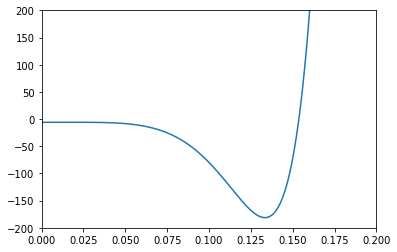

In [123]:
x = np.linspace(a, b, num=1000)
y = []
for i in range(len(x)):
    y.append(f(x[i], a_coeffs))
plt.plot(x, y)
plt.ylim(top=200, bottom=-200)
plt.xlim(right=0.2, left=0)

4. Теперь надо определить количество корней. Для можем воспользоваться следующими теоремами:
#### Теорема Декарта:
<br>Число положительных действительных корней уравнения $f(z) = 0$ с учетом их кратности либо равно числу перемен знаков в последовательности коэффициентов $\{a_{i}\}$(коэффициенты равные нулю не учитываются), либо на четное число меньше

In [10]:
#Теорема Декарта

#1. Положительные
cnt = 0
tmp = a_coeffs[0]
for i in a_coeffs:
    if(i*tmp < 0):
        cnt += 1
        tmp = i
root_cnt = []
tmp2 = cnt
while(tmp2 > 0):
    root_cnt.append(tmp2 - 2)
    tmp2 -= 2
print("Число положительных корней:", cnt, 'либо на четное число меньше:', root_cnt[:-1] )

#2. Отрицательные
cnt = 0
tmp = a_coeffs[0]
for i in range(len(a_coeffs)):
    if((-a_coeffs[i])*tmp < 0 and i%2 == 0):
        cnt += 1
        tmp = i
root_cnt = []
tmp2 = cnt
while(tmp2 > 0):
    root_cnt.append(tmp2 - 2)
    tmp2 -= 2
print("Число отрицтельных корней:", cnt)

Число положительных корней: 5 либо на четное число меньше: [3, 1]
Число отрицтельных корней: 1


#### Теорема Штурма:
<br> Число действительных корней уравнения $f(z) = 0$ на отрезке $[a,b]$(если среди них нет кратных) равно разности между числом перемен знаков в ряде Штурма при $x = a$ и $x = b$, где ряд Штурма последовательность: $f_{0} = f(x), f_{1} = f'(x), f_{2} = -Res\left\{\frac{f_{0}}{f_{1}}\right\}, ... , f_{n} = -Res\left\{\frac{f_{n-2}}{f_{n-1}}\right\}$

In [11]:
#Теорема Штурма
def derivative(a, n):
    tmp_a = a.copy()
    k = n
    for i in range(n-1):
        tmp_a[i] = k*tmp_a[i]
        k -= 1
    tmp_a.pop()
    return tmp_a

In [12]:
def sturm(f):
    f0 = f
    f1 = derivative(f0, 10)
    f_ser = [f0, f1]
    for i in range(2, len(f)):
        f_ser.append(list(np.polydiv(f_ser[i-2], f_ser[i-1])[1]))
    for i in range(2, len(f_ser)):
        for j in range(len(f_ser[i])):
            f_ser[i][j] = -f_ser[i][j]
    return f_ser

In [13]:
f_sturm_series = sturm(a_coeffs)
#Количество перемен знаков в a
tmp_sturm1 = f(a, f_sturm_series[0])
tmp_sturm2 = f(b, f_sturm_series[0])
signuma = 0
signumb = 0
for i in range(len(f_sturm_series)):
    if(tmp_sturm1*f(a, f_sturm_series[i]) < 0):
        tmp_sturm1 = f(a, f_sturm_series[i])
        signuma+=1
    if(tmp_sturm2*f(b, f_sturm_series[i]) < 0):
        tmp_sturm2 = f(b, f_sturm_series[i])
        signumb+=1
print('Количество корней между:', [a, b], 'получается:', signuma - signumb)

tmp_sturm1 = f(-a, f_sturm_series[0])
tmp_sturm2 = f(-b, f_sturm_series[0])
signuma = 0
signumb = 0
for i in range(len(f_sturm_series)):
    if(tmp_sturm1*f(-a, f_sturm_series[i]) < 0):
        tmp_sturm1 = f(-a, f_sturm_series[i])
        signuma+=1
    if(tmp_sturm2*f(-b, f_sturm_series[i]) < 0):
        tmp_sturm2 = f(-b, f_sturm_series[i])
        signumb+=1
print('Количество корней между:', [-b, -a], 'получается:', -signuma + signumb)

Количество корней между: [6.31392165231244e-11, 1.0000969780634914] получается: 1
Количество корней между: [-1.0000969780634914, -6.31392165231244e-11] получается: 1


5. Теперь найдем сами корни нашего уравнения.
#### Методы решений нелинейных уравнения:
#####  Метод половинного деления:
<br> Выбераем $x_0 = a, x_1 = b, x_2 = \frac{a+b}{2}$ , потом если $f(x_1)f(x_2) < 0$, то $x_3 = \frac{x_{1} + x_{2}}{2}$ ну и так далее
#####  Метод простой итерации:
<br> Пусть существует $x^{*}: f(x^*) = 0$ и $x^* = \phi(x^*)$, тогда можем начиная с какого нибудь $x_{0}$, может создать последовательность $x_{n} = \phi(x_{n-1})$, которая сойдется к $x^*$
#####  Метод Ньютона:
<br> Это фактически метод простой итерации, но $\phi(x) = x - \lambda(x)f(x)$, где $\lambda(x) = \frac{1}{f'(x)}$

In [33]:
#Метод половинного деления:
#1. Положительный корень
x0 = a
x1 = b
x2 = (a + b)/2
x = [x0, x1, x2]
for i in range(1, 1000):
    if(f(x[i-1], a_coeffs)*f(x[i+1], a_coeffs) < 0):
        x[i] = x[i-1]
        x.append((x[i-1]+x[i+1])/2)
    if(f(x[i], a_coeffs)*f(x[i+1], a_coeffs) < 0):
        x.append((x[i]+x[i+1])/2)
print('Положительный корень:', x[-1])
#2. Отрицательный корень
x0 = -b
x1 = -a
x2 = (x0 + x1)/2
x = [x0, x1, x2]
for i in range(1, 1000):
    if(f(x[i-1], a_coeffs)*f(x[i+1], a_coeffs) < 0):
        x[i] = x[i-1]
        x.append((x[i-1]+x[i+1])/2)
    if(f(x[i], a_coeffs)*f(x[i+1], a_coeffs) < 0):
        x.append((x[i]+x[i+1])/2)
print('Отрицательный корень:', x[-1])

Положительный корень: 0.15357934556172848
Отрицательный корень: -0.05798902161467333


In [42]:
#3. Точность метода половинного деления:
delta0 = abs(a - x[-1])
print('Точность метода половинного деления при 1000 итераций:', delta0/(2**(1000)))

Точность метода половинного деления при 1000 итераций: 5.4119044204496936e-303


In [16]:
#Метод простой итерации(Ньютона):
def method_newton(x, a):
    phi = []
    for i in range(25):
        f_x = f(x, a)
        f_der = derivative(a, 10)
        f_der_x = f(x, f_der) 
        x = x - f_x/f_der_x
        phi.append(x)
    return phi

In [17]:
print('Отрицательный корень:', method_newton(-b, a_coeffs)[-1])
print('Положительный корень:', method_newton(a, a_coeffs)[-1])

Отрицательный корень: -0.05796714759204364
Положительный корень: 0.1536926198939592


In [129]:
#Точность метода простой итерации
f_der_1 = derivative(a_coeffs, 10)
f_der_1_a = f(a, f_der_1)
f_der_2 = derivative(f_der_1, 9)
f_der_2_a = f(a, f_der_2)
q = abs(f(a, a_coeffs)*f_der_2_a)/(f_der_1_a**2)
print('Точность метода Ньютона:', abs(f(a, a_coeffs)/f_der_1_a)*q**25)

Точность метода Ньютона: 5.877368097519509e-10


In [130]:
q

0.42785109849511377

6. Подставим найденные корни и найдем $D_0$

In [165]:
z = method_newton(a, a_coeffs)[-1]
P1 = (z**n)*P3
U1 = U3 + 2*C3/(gamma3-1)*(1 - z**(1/n))
ro1 = ro0*((gamma0-1) + (gamma0+1)*P1/P0)/((gamma0+1)+(gamma0-1)*P1/P0)
D0 = (ro0*U0 - ro1*U1)/(ro0 - ro1)

In [167]:
print('Финальный ответ, скорость ударной волны D0:', D0, 'см/c')

Финальный ответ, скорость ударной волны D0: 87205.19485609754 см/c
